## DATA INGESTION

STUDY AIM

The aim is to model is to predict the median_house_value which is our target variable


Overcome missing data with a basic unsupervised learning data imputation


Identification of outliers in a dataset


Understand how to turn a simple model into your own sklearn comparible class, our aim won't be to create the most perfect model

In [156]:
# importing all the necessaries libraries
import numpy as np
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt
import os 
import seaborn as sns

## Loading the dataset

In [157]:
df= pd.read_csv("Country-data.csv")

In [158]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## PREMILARY DATA ANALYSIS

In [159]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [160]:
df.shape

(167, 10)

In [161]:
# Checking out for missing value
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [162]:
df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

## Exploratory data analysis

Descriptive Data Analysis

In [163]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [165]:
num_col= df.select_dtypes(include="number").columns
num_col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [166]:
import math

def plot_all_histogram(df, title_prefix="**"):
    n_col= 3
    num_col= df.select_dtypes(include=[np.number]).columns
    num_rows = math.ceil(len(num_col) / n_col)

    plt.Figure(figsize=(5 * n_col, 4 * num_rows))


    for i, col  in enumerate(num_col, 1):
        plt.subplot(num_rows, n_col, i)
        sns.histplot(df[col],kde=True, bins=30)
        plt.title(f"{title_prefix} {col}")
        plt.xlabel("")
        plt.ylabel("")


    plt.tight_layout()
    plt.show()





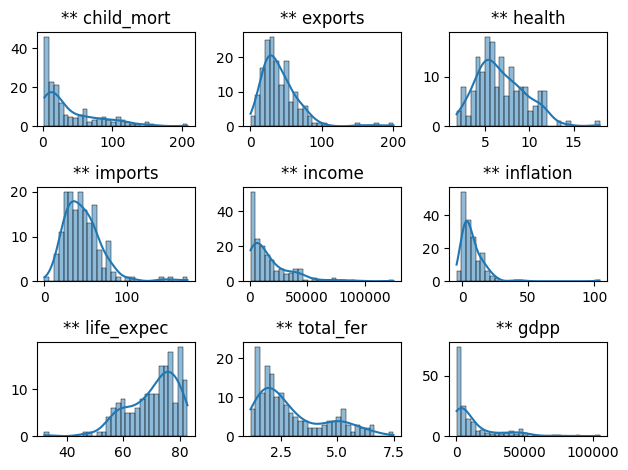

In [167]:
plot_all_histogram(df)

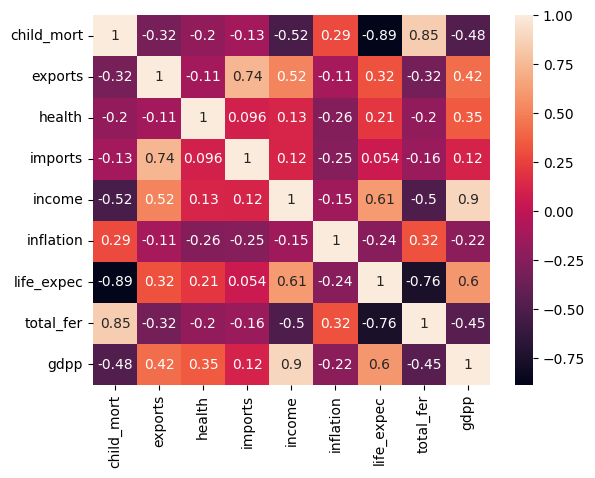

In [168]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [169]:
data= df.drop("country", axis=1)

In [171]:
data.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [172]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data= scaler.fit_transform(data)

In [176]:
data.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [177]:
data = pd.DataFrame(data, columns=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp'])

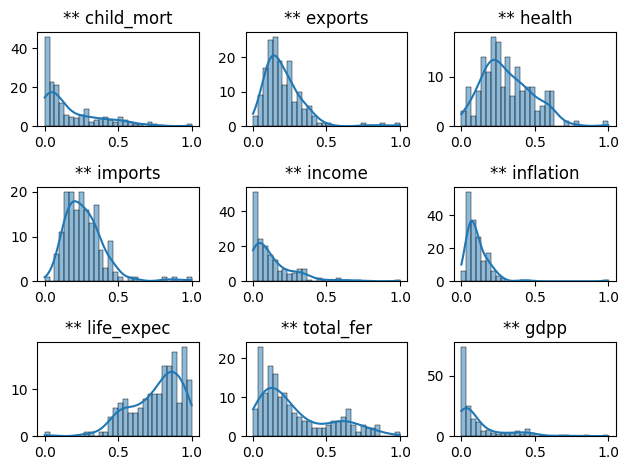

In [178]:
plot_all_histogram(data)

In [179]:
from sklearn.decomposition import PCA
pca= PCA()
pca_data = pd.DataFrame(pca.fit_transform(data))